In [1]:
import pandas as pd
train_dataset=pd.read_csv('C:/Users/m_vivekanandan/Downloads/archive (2)/train_energy_data.csv')
test_dataset=pd.read_csv('C:/Users/m_vivekanandan/Downloads/archive (2)/test_energy_data.csv')

In [2]:
train_dataset

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17
...,...,...,...,...,...,...,...
995,Residential,14419,68,44,23.95,Weekend,3661.21
996,Industrial,12194,7,22,14.67,Weekend,3546.34
997,Commercial,39562,88,20,32.18,Weekday,5147.21
998,Residential,8348,67,37,16.48,Weekend,3244.98


In [3]:
test_dataset

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39


In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [5]:
test_dataset.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for Day of Week
label_encoder = LabelEncoder()
test_dataset['Day of Week'] = label_encoder.fit_transform(test_dataset['Day of Week'])
train_dataset['Day of Week'] = label_encoder.fit_transform(train_dataset['Day of Week'])
train_dataset['Building Type'] = label_encoder.fit_transform(train_dataset['Building Type'])
test_dataset['Building Type'] = label_encoder.fit_transform(test_dataset['Building Type'])
test_dataset

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,2,24563,15,4,28.52,0,2865.57
1,0,27583,56,23,23.07,1,4283.80
2,0,45313,4,44,33.56,0,5067.83
3,2,41625,84,17,27.39,1,4624.30
4,2,36720,58,47,17.08,0,4820.59
...,...,...,...,...,...,...,...
95,0,1161,81,11,15.45,1,3010.81
96,2,37943,50,23,21.73,1,4248.49
97,0,1558,27,29,16.86,1,2843.60
98,1,2145,56,12,11.77,1,3348.39


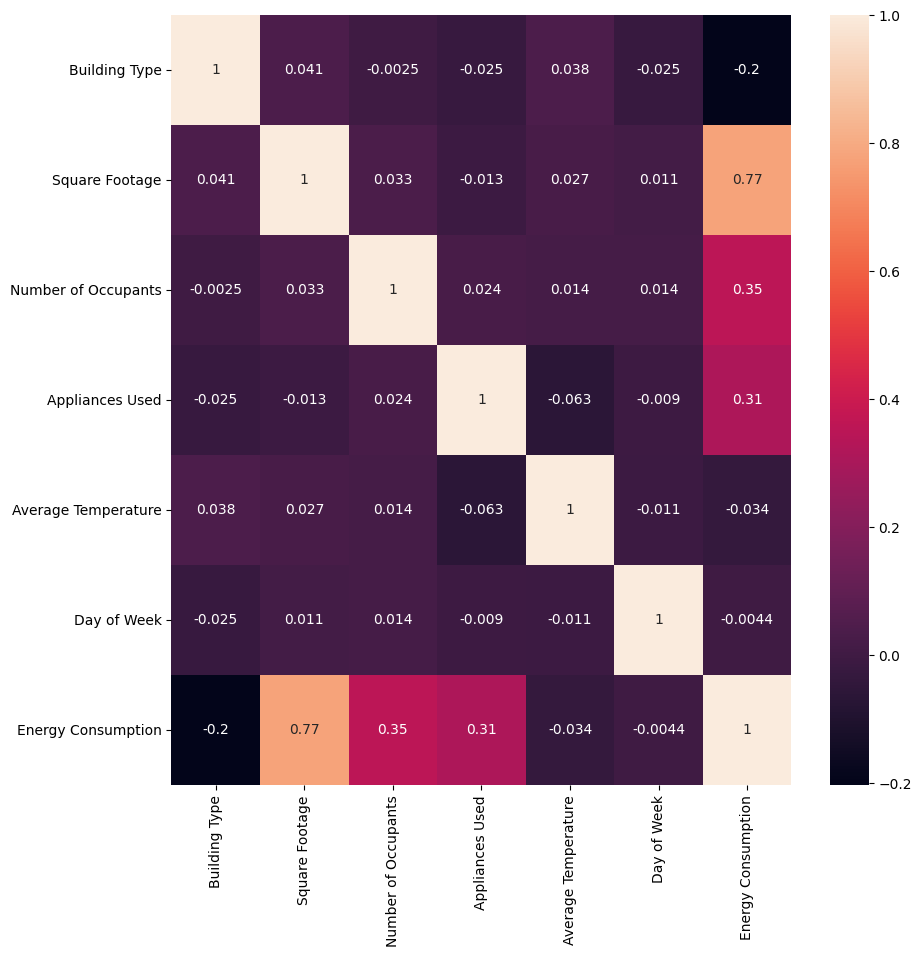

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
con=train_dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(con,annot=True)
plt.show()

In [7]:
x_train=train_dataset.drop('Energy Consumption',axis=1)
y_train=train_dataset.iloc[:,4]
x_test=test_dataset.drop('Energy Consumption',axis=1)
y_test=test_dataset.iloc[:,4]

In [8]:
from sklearn.linear_model import LinearRegression
Energy_consumption_model=LinearRegression()
Energy_consumption_model.fit(x_train,y_train)

LinearRegression()

In [9]:
from sklearn.metrics import r2_score
result=Energy_consumption_model.predict(x_test)
print(r2_score(y_test,result))

1.0


In [10]:
import pickle 
pickle.dump(Energy_consumption_model, open('Energy_consumption_model.pkl','wb'))